In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [4]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 3s 199us/step - loss: 0.5098 - acc: 0.7804 - val_loss: 0.3825 - val_acc: 0.8667
Epoch 2/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.3012 - acc: 0.9039 - val_loss: 0.2994 - val_acc: 0.8908
Epoch 3/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.2161 - acc: 0.9287 - val_loss: 0.3079 - val_acc: 0.8725
Epoch 4/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1728 - acc: 0.9436 - val_loss: 0.2836 - val_acc: 0.8846
Epoch 5/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1395 - acc: 0.9552 - val_loss: 0.2854 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1119 - acc: 0.9658 - val_loss: 0.3103 - val_acc: 0.8800
Epoch 7/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.0943 - acc: 0.9721 - val_loss: 0

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

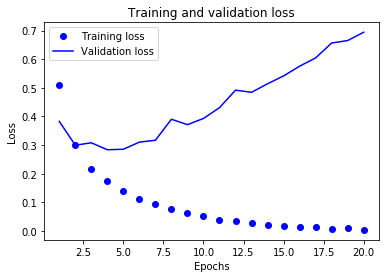

In [13]:
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

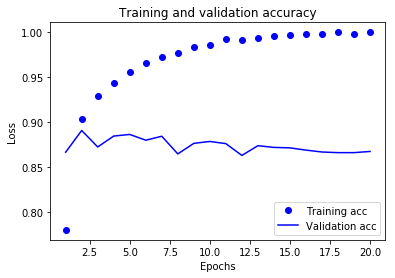

In [14]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [36]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.4914 - acc: 0.7904 - val_loss: 0.3738 - val_acc: 0.8724
Epoch 2/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.3041 - acc: 0.9045 - val_loss: 0.3105 - val_acc: 0.8854
Epoch 3/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.2349 - acc: 0.9268 - val_loss: 0.2883 - val_acc: 0.8884
Epoch 4/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.1937 - acc: 0.9415 - val_loss: 0.2867 - val_acc: 0.8849
Epoch 5/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.1638 - acc: 0.9513 - val_loss: 0.2733 - val_acc: 0.8895
Epoch 6/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1420 - acc: 0.9588 - val_loss: 0.2764 - val_acc: 0.8896
Epoch 7/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.1225 - acc: 0.9652 - val_loss: 0.3019 - 

In [37]:
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.1608 - acc: 0.7834 - val_loss: 0.1078 - val_acc: 0.8785
Epoch 2/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.0817 - acc: 0.9109 - val_loss: 0.1000 - val_acc: 0.8670
Epoch 3/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.0605 - acc: 0.9327 - val_loss: 0.0947 - val_acc: 0.8743
Epoch 4/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.0456 - acc: 0.9491 - val_loss: 0.0833 - val_acc: 0.8864
Epoch 5/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.0366 - acc: 0.9591 - val_loss: 0.0843 - val_acc: 0.8860
Epoch 6/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.0295 - acc: 0.9681 - val_loss: 0.0860 - val_acc: 0.8834
Epoch 7/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.0231 - acc: 0.9762 - val_loss: 0.0928 - 

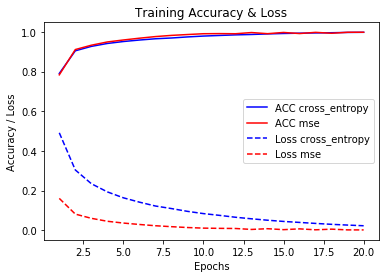

In [38]:
history_dict1 = history1.history
history_dict1.keys()
history_dict2 = history2.history
history_dict2.keys()


plt.clf()   # clear figure
acc_values1 = history_dict1['acc']
acc_values2 = history_dict2['acc']
loss_values1 = history_dict1['loss']
loss_values2 = history_dict2['loss']



epochs = range(1, len(acc_values1) + 1)


plt.plot(epochs, acc_values1, 'b', label='ACC cross_entropy')
plt.plot(epochs, acc_values2, 'r', label='ACC mse')
plt.plot(epochs, loss_values1, 'b--', label='Loss cross_entropy')
plt.plot(epochs, loss_values2, 'r--', label='Loss mse')

plt.title('Training Accuracy & Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.show()